##### Student Information
Name: 趙宇涵

Student ID: 110033635

GitHub ID: honey0703

---

### Instructions

1. First: do the **take home** exercises in the [DM2021-Lab1-master Repo](https://github.com/fhcalderon87/DM2021-Lab1-master). You may need to copy some cells from the Lab notebook to this notebook. __This part is worth 20% of your grade.__


2. Second: follow the same process from the [DM2021-Lab1-master Repo](https://github.com/fhcalderon87/DM2021-Lab1-master) on **the new dataset**. You don't need to explain all details as we did (some **minimal comments** explaining your code are useful though).  __This part is worth 30% of your grade.__
    - Download the [the new dataset](https://archive.ics.uci.edu/ml/datasets/Sentiment+Labelled+Sentences#). The dataset contains a `sentence` and `score` label. Read the specificiations of the dataset for details. 
    - You are allowed to use and modify the `helper` functions in the folder of the first lab session (notice they may need modification) or create your own.


3. Third: please attempt the following tasks on **the new dataset**. __This part is worth 30% of your grade.__
    - Generate meaningful **new data visualizations**. Refer to online resources and the Data Mining textbook for inspiration and ideas. 
    - Generate **TF-IDF features** from the tokens of each text. This will generating a document matrix, however, the weights will be computed differently (using the TF-IDF value of each word per document as opposed to the word frequency). Refer to this Sciki-learn [guide](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html) .
    - Implement a simple **Naive Bayes classifier** that automatically classifies the records into their categories. Use both the TF-IDF features and word frequency features to build two seperate classifiers. Comment on the differences.  Refer to this [article](https://hub.packtpub.com/implementing-3-naive-bayes-classifiers-in-scikit-learn/).


4. Fourth: In the lab, we applied each step really quickly just to illustrate how to work with your dataset. There are somethings that are not ideal or the most efficient/meaningful. Each dataset can be habdled differently as well. What are those inefficent parts you noticed? How can you improve the Data preprocessing for these specific datasets? __This part is worth 10% of your grade.__


5. Fifth: It's hard for us to follow if your code is messy :'(, so please **tidy up your notebook** and **add minimal comments where needed**. __This part is worth 10% of your grade.__


You can submit your homework following these guidelines: [Git Intro & How to hand your homework](https://github.com/fhcalderon87/DM2021-Lab1-master/blob/main/Git%20Intro%20%26%20How%20to%20hand%20your%20homework.ipynb). Make sure to commit and save your changes to your repository __BEFORE the deadline (Nov. 4th 11:59 pm, Thursday)__. 

In [1]:
### Begin Assignment Here
%load_ext autoreload
%autoreload 2

## Second: the new dataset

In [2]:
import csv
import pandas as pd
import numpy as np
import helpers.data_mining_helpers as dmh

In [3]:
def file(name):
    
    f = open('sentiment labelled sentences/{}'.format(name), 'r')
    
    text = []
    score = []
    dataset = []
    
    while True:
        read = f.readline()  # read the dataset line by line
        
        if not read: 
            break
            
        data = read.split('\t',) 
        data_text = data[0]
        text.append(data_text)
        data_score_ = data[1].split('\n',)
        data_score = data_score_[0]
        score.append(data_score)
        dataset.append(name)
        dataset = [i.split('_',)[0] for i in dataset]

    return text, score, dataset


In [4]:
files = ['amazon_cells_labelled.txt', 'imdb_labelled.txt', 'yelp_labelled.txt']
texts = []
scores = []
datasets = []
for file_ in files:
    text, score, dataset = file(file_)
    texts += text
    scores += score
    datasets += dataset

In [5]:
print(len(texts))

3000


In [6]:
print(len(datasets))

3000


In [7]:
data = {'text': texts, 'score': scores, 'dataset': datasets}
df = pd.DataFrame(data)

In [8]:
# -- sample the df -- #
df = df.sample(frac=1).reset_index(drop=True)

In [9]:
def score_to_rate(score):
    if score == '1':
        return 'positive'
    else:
        return 'negative'

df['rate'] = df.score.apply(lambda t: score_to_rate(t))

In [10]:
print(df)

                                                   text score dataset  \
0     She was quite disappointed although some blame...     0    yelp   
1     I am very impressed with this headset from Pla...     1  amazon   
2               I was very disappointed in the movie.       0    imdb   
3     I really hope the team behind this movie makes...     1    imdb   
4           To call this movie a drama is ridiculous!       0    imdb   
...                                                 ...   ...     ...   
2995  But when someone strives for greatness and poe...     0    imdb   
2996                        Raw and sublimely moving.       1    imdb   
2997  I ordered Albondigas soup - which was just war...     0    yelp   
2998  Poor service, the waiter made me feel like I w...     0    yelp   
2999                          Will never, ever go back.     0    yelp   

          rate  
0     negative  
1     positive  
2     negative  
3     positive  
4     negative  
...        ...  
2995

In [11]:
for _ in data['text'][:3]:
    print(_)

So there is no way for me to plug it in here in the US unless I go by a converter.
Good case, Excellent value.
Great for the jawbone.


### ** >>> Exercise 2 (take home):** 

In [12]:
print(df.sample(n=5))

                                                   text score dataset  \
748    I won't try going back there even if it's empty.     0    yelp   
2297  The headset fulfills my requirements so I am h...     1  amazon   
365       Yes it's shiny on front side - and I love it!     1  amazon   
1804  Do yourself a favor and stay away from this dish.     0    yelp   
397   We also ordered the spinach and avocado salad;...     0    yelp   

          rate  
748   negative  
2297  positive  
365   positive  
1804  negative  
397   negative  


### ** >>> Exercise 3 (5 min): **  

In [13]:
df.loc[lambda f: f.dataset == 'yelp'].iloc[::10, :][0:5]

text score dataset      rate
0    She was quite disappointed although some blame...     0    yelp  negative
26                  Generous portions and great taste.     1    yelp  positive
47   They have horrible attitudes towards customers...     0    yelp  negative
86   And considering the two of us left there very ...     1    yelp  positive
111  So don't go there if you are looking for good ...     0    yelp  negative

## 4. Data Mining using Pandas

In [14]:
df.isnull()

text  score  dataset   rate
0     False  False    False  False
1     False  False    False  False
2     False  False    False  False
3     False  False    False  False
4     False  False    False  False
...     ...    ...      ...    ...
2995  False  False    False  False
2996  False  False    False  False
2997  False  False    False  False
2998  False  False    False  False
2999  False  False    False  False

[3000 rows x 4 columns]

In [15]:
df.isnull().apply(lambda x: dmh.check_missing_values(x))

text                               score  \
0  The amoung of missing records is:   The amoung of missing records is:    
1                                   0                                   0   

                              dataset                                rate  
0  The amoung of missing records is:   The amoung of missing records is:   
1                                   0                                   0

### >>> **Exercise 4 (5 min):** 

In [16]:
df.isnull().apply(lambda x: dmh.check_missing_values(x), axis = 1)

0       (The amoung of missing records is: , 0)
1       (The amoung of missing records is: , 0)
2       (The amoung of missing records is: , 0)
3       (The amoung of missing records is: , 0)
4       (The amoung of missing records is: , 0)
                         ...                   
2995    (The amoung of missing records is: , 0)
2996    (The amoung of missing records is: , 0)
2997    (The amoung of missing records is: , 0)
2998    (The amoung of missing records is: , 0)
2999    (The amoung of missing records is: , 0)
Length: 3000, dtype: object

In [17]:
dummy_series = pd.Series(["dummy_record", 1], index=["text", "score"]) #add 0(dummy) data

In [18]:
dummy_series

text     dummy_record
score               1
dtype: object

In [19]:
result_with_series = df.append(dummy_series, ignore_index=True)

In [20]:
# check if the records was commited into result
len(result_with_series)

3001

In [21]:
result_with_series.isnull().apply(lambda x: dmh.check_missing_values(x))

text                               score  \
0  The amoung of missing records is:   The amoung of missing records is:    
1                                   0                                   0   

                              dataset                                rate  
0  The amoung of missing records is:   The amoung of missing records is:   
1                                   1                                   1

In [22]:
# dummy record as dictionary format      #another way to add dummy
dummy_dict = [{'text': 'dummy_record',
               'score': 1
              }]

In [23]:
df = df.append(dummy_dict, ignore_index=True)

In [24]:
len(df)

3001

In [25]:
df.isnull().apply(lambda x: dmh.check_missing_values(x))

text                               score  \
0  The amoung of missing records is:   The amoung of missing records is:    
1                                   0                                   0   

                              dataset                                rate  
0  The amoung of missing records is:   The amoung of missing records is:   
1                                   1                                   1

In [26]:
df.dropna(inplace=True)     #remove null data

In [27]:
df.isnull().apply(lambda x: dmh.check_missing_values(x))

text                               score  \
0  The amoung of missing records is:   The amoung of missing records is:    
1                                   0                                   0   

                              dataset                                rate  
0  The amoung of missing records is:   The amoung of missing records is:   
1                                   0                                   0

In [28]:
len(df)

3000

### 4.2 Dealing with Duplicate Data

In [29]:
df.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
2995    False
2996    False
2997    False
2998    False
2999    False
Length: 3000, dtype: bool

In [30]:
sum(df.duplicated())

17

In [31]:
sum(df.duplicated('text'))  #specific column

17

In [32]:
df.drop_duplicates(keep=False, inplace=True) # inplace applies changes directly on our dataframe

In [33]:
len(df)

2966

## 5.  Data Preprocessing

### 5.1 Sampling

In [34]:
df_sample = df.sample(n=1000) #random state

In [35]:
len(df_sample)

1000

In [36]:
df_sample[0:4]

text score dataset  \
1081                                    Waste of money.     0  amazon   
306                   Strike 2, who wants to be rushed.     0    yelp   
893   I love this cable - it allows me to connect an...     1  amazon   
799   This movie is a pure disaster, the story is st...     0    imdb   

          rate  
1081  negative  
306   negative  
893   positive  
799   negative

In [37]:
import matplotlib.pyplot as plt
%matplotlib inline

negative    1486
positive    1480
Name: rate, dtype: int64


<AxesSubplot:title={'center':'Rate distribution'}>

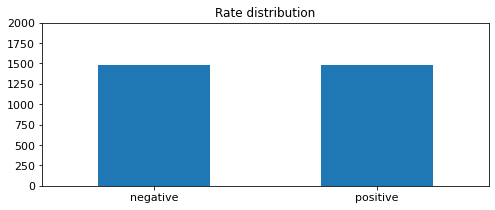

In [38]:
print(df.rate.value_counts())

# plot barchart for X_sample
df.rate.value_counts().plot(kind = 'bar',
                                    title = 'Rate distribution',
                                    ylim = [0, 2000],         #y axis limit
                                    rot = 0, fontsize = 11, figsize = (8,3))

<AxesSubplot:title={'center':'Rate distribution'}>

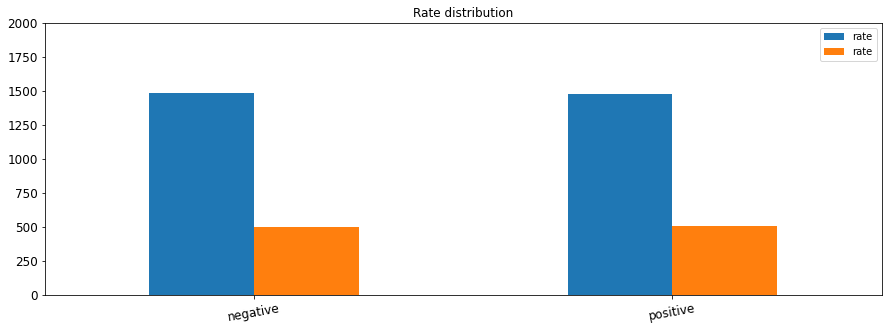

In [39]:
pd.concat([df.rate.value_counts(), df_sample.rate.value_counts()], axis=1).plot(kind = 'bar',
                                                             title = 'Rate distribution',
                                                             ylim = [0, 2000],       
                                                             rot = 10, fontsize = 12, figsize = (15,5))

### 5.2 Feature Creation

In [40]:
import nltk

In [41]:
# takes a like a minute or two to process
df['unigrams'] = df['text'].apply(lambda x: dmh.tokenize_text(x))

In [42]:
df[0:4]["unigrams"]

0    [She, was, quite, disappointed, although, some...
1    [I, am, very, impressed, with, this, headset, ...
2      [I, was, very, disappointed, in, the, movie, .]
3    [I, really, hope, the, team, behind, this, mov...
Name: unigrams, dtype: object

In [43]:
df[0:4]

text score dataset      rate  \
0  She was quite disappointed although some blame...     0    yelp  negative   
1  I am very impressed with this headset from Pla...     1  amazon  positive   
2            I was very disappointed in the movie.       0    imdb  negative   
3  I really hope the team behind this movie makes...     1    imdb  positive   

                                            unigrams  
0  [She, was, quite, disappointed, although, some...  
1  [I, am, very, impressed, with, this, headset, ...  
2    [I, was, very, disappointed, in, the, movie, .]  
3  [I, really, hope, the, team, behind, this, mov...

In [44]:
list(df[0:1]['unigrams'])

[['She',
  'was',
  'quite',
  'disappointed',
  'although',
  'some',
  'blame',
  'needs',
  'to',
  'be',
  'placed',
  'at',
  'her',
  'door',
  '.']]

### 5.3 Feature subset selection

In [45]:
from sklearn.feature_extraction.text import CountVectorizer

count_vect = CountVectorizer()
df_counts = count_vect.fit_transform(df.text)
print (df_counts)

  (0, 4021)	1
  (0, 4966)	1
  (0, 3576)	1
  (0, 1295)	1
  (0, 194)	1
  (0, 4174)	1
  (0, 498)	1
  (0, 3011)	1
  (0, 4607)	1
  (0, 416)	1
  (0, 3350)	1
  (0, 314)	1
  (0, 2156)	1
  (0, 1357)	1
  (1, 197)	1
  (1, 4888)	1
  (1, 2304)	1
  (1, 5067)	1
  (1, 4556)	1
  (1, 2126)	1
  (1, 1882)	1
  (1, 3359)	1
  (2, 4966)	1
  (2, 1295)	1
  (2, 4888)	1
  :	:
  (2963, 4957)	1
  (2963, 175)	1
  (2963, 4619)	1
  (2963, 2819)	1
  (2964, 4966)	1
  (2964, 4607)	1
  (2964, 4529)	2
  (2964, 3992)	1
  (2964, 2637)	1
  (2964, 4591)	1
  (2964, 1585)	1
  (2964, 2808)	1
  (2964, 2736)	1
  (2964, 3408)	1
  (2964, 4451)	1
  (2964, 4353)	1
  (2964, 2121)	1
  (2964, 4941)	1
  (2964, 666)	1
  (2964, 1713)	1
  (2965, 5047)	1
  (2965, 3025)	1
  (2965, 1584)	1
  (2965, 1981)	1
  (2965, 367)	1


In [46]:
analyze = count_vect.build_analyzer()
analyze("Hello World!")

['hello', 'world']

### **>>> Exercise 9 (5 min):**

In [47]:
analyze(" ".join(list(df[:1].text)))

['she',
 'was',
 'quite',
 'disappointed',
 'although',
 'some',
 'blame',
 'needs',
 'to',
 'be',
 'placed',
 'at',
 'her',
 'door']

In [48]:
df_counts.shape

(2966, 5153)

In [49]:
count_vect.get_feature_names()[0:10]

['00', '10', '100', '11', '12', '13', '15', '15g', '15pm', '17']

In [50]:
df[0:5]

text score dataset      rate  \
0  She was quite disappointed although some blame...     0    yelp  negative   
1  I am very impressed with this headset from Pla...     1  amazon  positive   
2            I was very disappointed in the movie.       0    imdb  negative   
3  I really hope the team behind this movie makes...     1    imdb  positive   
4        To call this movie a drama is ridiculous!       0    imdb  negative   

                                            unigrams  
0  [She, was, quite, disappointed, although, some...  
1  [I, am, very, impressed, with, this, headset, ...  
2    [I, was, very, disappointed, in, the, movie, .]  
3  [I, really, hope, the, team, behind, this, mov...  
4  [To, call, this, movie, a, drama, is, ridiculo...

In [51]:
df_counts[0:5, 0:100].toarray()

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0,

In [52]:
count_vect.transform(['Something completely new.']).toarray()

array([[0, 0, 0, ..., 0, 0, 0]])

In [53]:
count_vect.transform(['00 Something completely new.']).toarray()

array([[1, 0, 0, ..., 0, 0, 0]])

In [54]:
# first twenty features only
plot_x = ["term_"+str(i) for i in count_vect.get_feature_names()[0:20]]

In [55]:
plot_x

['term_00',
 'term_10',
 'term_100',
 'term_11',
 'term_12',
 'term_13',
 'term_15',
 'term_15g',
 'term_15pm',
 'term_17',
 'term_18',
 'term_18th',
 'term_1928',
 'term_1947',
 'term_1948',
 'term_1949',
 'term_1971',
 'term_1973',
 'term_1979',
 'term_1980']

In [56]:
# obtain document index
plot_y = ["doc_"+ str(i) for i in list(df.index)[0:20]]

In [57]:
plot_y

['doc_0',
 'doc_1',
 'doc_2',
 'doc_3',
 'doc_4',
 'doc_5',
 'doc_6',
 'doc_7',
 'doc_8',
 'doc_9',
 'doc_10',
 'doc_11',
 'doc_12',
 'doc_13',
 'doc_14',
 'doc_15',
 'doc_16',
 'doc_17',
 'doc_18',
 'doc_19']

In [58]:
plot_z = df_counts[0:20, 0:20].toarray()

In [59]:
plot_z

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0,

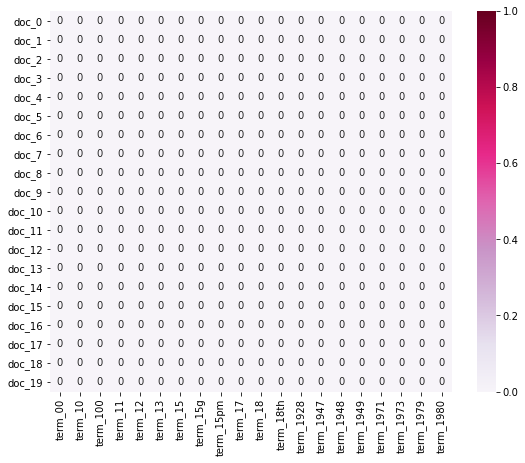

In [60]:
import seaborn as sns

df_todraw = pd.DataFrame(plot_z, columns = plot_x, index = plot_y)
plt.subplots(figsize=(9, 7))
ax = sns.heatmap(df_todraw,
                 cmap="PuRd",
                 vmin=0, vmax=1, annot=True)

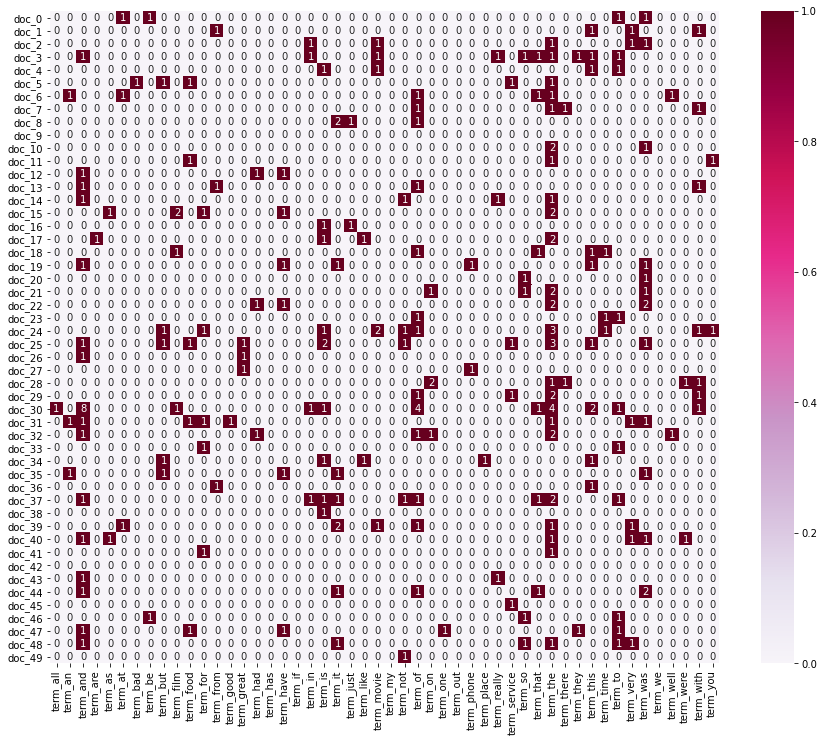

In [61]:
count_vect = CountVectorizer(max_features=50)    
df_counts = count_vect.fit_transform(df.text)

plot_x = ["term_"+str(i) for i in count_vect.get_feature_names()[0:50]]
plot_y = ["doc_"+ str(i) for i in list(df.index)[0:50]]
plot_z = df_counts[0:50, 0:50].toarray()

df_todraw = pd.DataFrame(plot_z, columns = plot_x, index = plot_y)
plt.subplots(figsize=(15, 12))
ax = sns.heatmap(df_todraw,
                 cmap="PuRd",
                 vmin=0, vmax=1, annot=True)

### 5.4 Dimensionality Reduction

In [62]:
from sklearn.decomposition import PCA

In [63]:
df_reduced = PCA(n_components = 2).fit_transform(df_counts.toarray())

In [64]:
df_reduced.shape

(2966, 2)

In [65]:
score

['1',
 '0',
 '0',
 '1',
 '1',
 '0',
 '0',
 '0',
 '1',
 '1',
 '1',
 '0',
 '0',
 '1',
 '0',
 '0',
 '1',
 '0',
 '0',
 '0',
 '0',
 '1',
 '1',
 '1',
 '1',
 '1',
 '0',
 '1',
 '0',
 '0',
 '1',
 '0',
 '1',
 '0',
 '1',
 '1',
 '1',
 '0',
 '1',
 '0',
 '1',
 '0',
 '0',
 '1',
 '0',
 '1',
 '0',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '0',
 '1',
 '1',
 '0',
 '0',
 '1',
 '0',
 '0',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '0',
 '1',
 '1',
 '1',
 '0',
 '0',
 '0',
 '0',
 '0',
 '1',
 '1',
 '0',
 '0',
 '0',
 '0',
 '1',
 '0',
 '1',
 '0',
 '1',
 '1',
 '1',
 '0',
 '1',
 '0',
 '1',
 '0',
 '0',
 '1',
 '1',
 '0',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '0',
 '0',
 '1',
 '1',
 '1',
 '1',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '1',
 '1',
 '1',
 '0',
 '0',
 '1',
 '0',
 '1',
 '0',
 '1',
 '1',
 '0',
 '1',
 '1',
 '1',
 '1',
 '0',
 '1',
 '0',
 '0',
 '0',
 '0',
 '1',
 '1',
 '0',
 '0',
 '0',
 '0',
 '1',
 '1',
 '0',
 '0',
 '1',
 '1',
 '1',
 '1',
 '1',
 '0',
 '0',
 '1',
 '1',
 '0',
 '1',
 '1',
 '1'

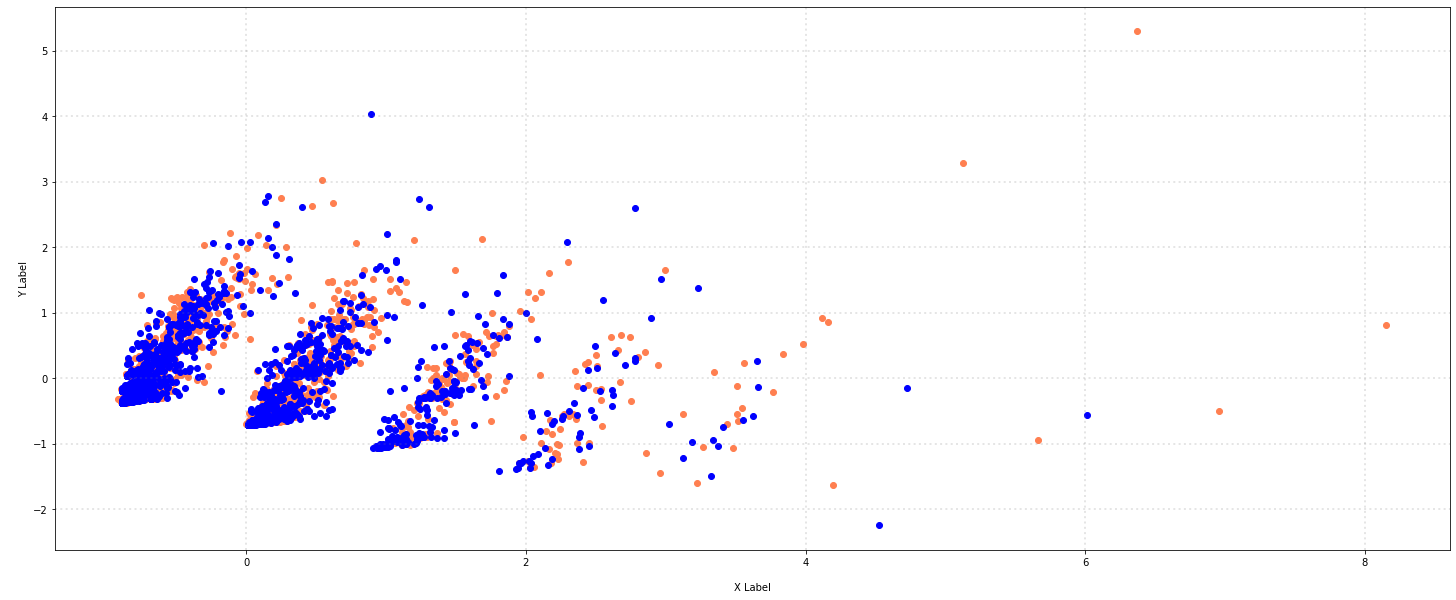

In [66]:
col = ['coral', 'blue']

# plot
fig = plt.figure(figsize = (25,10))
ax = fig.subplots()

for c, score in zip(col, score):
    xs = df_reduced[df['score'] == score].T[0]
    ys = df_reduced[df['score'] == score].T[1]
   
    ax.scatter(xs, ys, c = c, marker='o')

ax.grid(color='gray', linestyle=':', linewidth=2, alpha=0.2)
ax.set_xlabel('\nX Label')
ax.set_ylabel('\nY Label')

plt.show()

### >>> Exercise 12 (take home):

In [67]:
df_reduced = PCA(n_components = 3).fit_transform(df_counts.toarray())

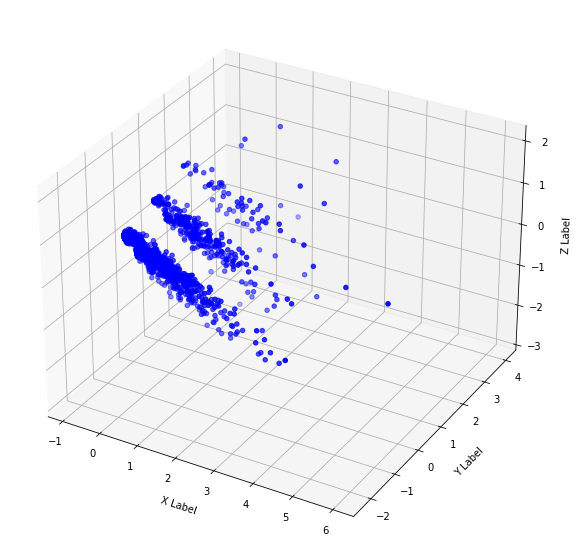

In [68]:
col = ['blue', 'black']

# plot
fig = plt.figure(figsize = (25,10))
ax = fig.add_subplot(projection='3d')

for c, score in zip(col, score):
    xs = df_reduced[df['score'] == score].T[0]
    ys = df_reduced[df['score'] == score].T[1]
    zs = df_reduced[df['score'] == score].T[2]
   
    ax.scatter(xs, ys, zs, c = c, marker='o')

ax.grid(color='gray', linestyle=':', linewidth=2, alpha=0.2)
ax.set_xlabel('\nX Label')
ax.set_ylabel('\nY Label')
ax.set_zlabel('\nZ Label')

plt.show()

### 5.5 Atrribute Transformation / Aggregation



In [69]:
term_frequencies = []
for j in range(0,df_counts.shape[1]):
    term_frequencies.append(sum(df_counts[:,j].toarray()))

In [70]:
term_frequencies = np.asarray(df_counts.sum(axis=0))[0]

In [71]:
term_frequencies[0]

148

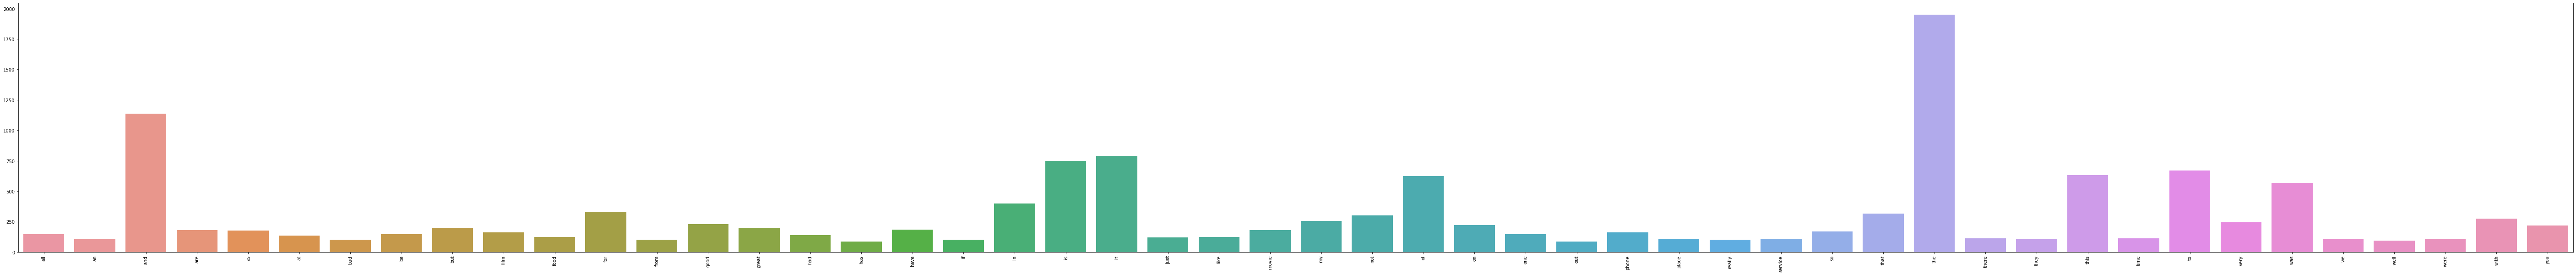

In [72]:
plt.subplots(figsize=(100, 10))
g = sns.barplot(x=count_vect.get_feature_names()[:300], 
            y=term_frequencies[:300])
g.set_xticklabels(count_vect.get_feature_names()[:300], rotation = 90);

## >>> **Exercise 13 (take home):**

In [73]:
import plotly.express as px

#fine array of term frequency
term_frequencies = []
for j in range(0,df_counts.shape[1]):
    term_frequencies.append(sum(df_counts[:,j].toarray()))
term_frequencies = np.asarray(df_counts.sum(axis=0))[0]

#fine array of word term
term_of_word = np.asarray(["term_"+str(i) for i in count_vect.get_feature_names()])

#make DataFrame to plot bar chart
to_dict ={'term_frequencies' :term_frequencies,'word': term_of_word}
to_df=pd.DataFrame(to_dict)

#plot bar chart of term 0-300
fig = px.bar(to_df[0:300], x="word", y="term_frequencies")
fig.show()

### >>> **Exercise 14 (take home):** 

In [74]:
# Find top 50 frequency of terms from the whole dataset
count_vect = CountVectorizer(max_features=50)    
df_counts = count_vect.fit_transform(df.text)

#fine array of term frequency
term_frequencies = []
for j in range(0,df_counts.shape[1]):
    term_frequencies.append(sum(df_counts[:,j].toarray()))
term_frequencies = np.asarray(df_counts.sum(axis=0))[0]

#fine array of word term
term_of_word = np.asarray(["term_"+str(i) for i in count_vect.get_feature_names()])

#make DataFrame to plot bar chart
to_dict ={'term_frequencies' :term_frequencies,'word': term_of_word}
to_df=pd.DataFrame(to_dict)

## Visualize top 100 frequency term
fig = px.bar(to_df, x="word", y="term_frequencies")
fig.show()

### >>> **Exercise 15 (take home):**

In [75]:
# Find top 50 frequency of terms from the whole dataset
count_vect = CountVectorizer()    
df_counts = count_vect.fit_transform(df.text)

#fine array of term frequency
term_frequencies = []
for j in range(0,df_counts.shape[1]):
    term_frequencies.append(sum(df_counts[:,j].toarray()))
term_frequencies = np.asarray(df_counts.sum(axis=0))[0]

#fine array of word term
term_of_word = np.asarray(["term_"+str(i) for i in count_vect.get_feature_names()])


#make DataFrame to plot bar chart, and sort the word frequency by descending order
to_dict ={'term_frequencies' :term_frequencies,'word': term_of_word}
to_df=pd.DataFrame(to_dict).sort_values(by=['term_frequencies'], ascending=False)

#plot bar chart of top 50 word frequency
fig = px.bar(to_df[0:50], x="word", y="term_frequencies")
fig.show()


In [76]:
import math
term_frequencies_log = [math.log(i) for i in term_frequencies]

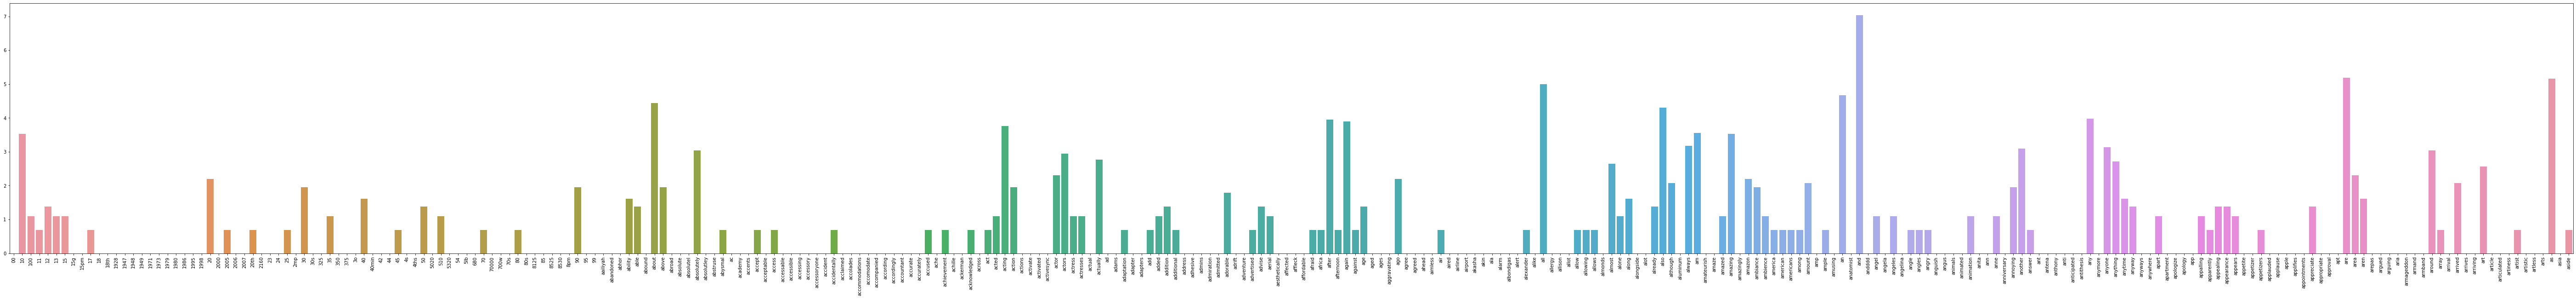

In [77]:
plt.subplots(figsize=(100, 10))
g = sns.barplot(x=count_vect.get_feature_names()[:300],
                y=term_frequencies_log[:300])
g.set_xticklabels(count_vect.get_feature_names()[:300], rotation = 90);

### 5.6 Discretization and Binarization


In [78]:
from sklearn import preprocessing, metrics, decomposition, pipeline, dummy

In [79]:
mlb = preprocessing.LabelBinarizer()

In [80]:
mlb.fit(df.score)

LabelBinarizer()

In [81]:
mlb.classes_

array(['0', '1'], dtype='<U1')

In [82]:
df['bin_category'] = mlb.transform(df['score']).tolist()

In [83]:
df[0:9]

text score dataset      rate  \
0  She was quite disappointed although some blame...     0    yelp  negative   
1  I am very impressed with this headset from Pla...     1  amazon  positive   
2            I was very disappointed in the movie.       0    imdb  negative   
3  I really hope the team behind this movie makes...     1    imdb  positive   
4        To call this movie a drama is ridiculous!       0    imdb  negative   
5  I can take a little bad service but the food s...     0    yelp  negative   
6  The camera, although rated at an impressive 1....     0  amazon  negative   
7              Up there with the best of Melville.       1    imdb  positive   
8               None of it works, just don't buy it.     0  amazon  negative   

                                            unigrams bin_category  
0  [She, was, quite, disappointed, although, some...          [0]  
1  [I, am, very, impressed, with, this, headset, ...          [1]  
2    [I, was, very, disappointed, in, the, movie, .]          [0]  
3  [I, really, hope, the, team, behind, this, mov...          [1]  
4  [To, call, this, movie, a, drama, is, ridiculo...          [0]  
5  [I, can, take, a, little, bad, service, but, t...          [0]  
6  [The, camera, ,, although, rated, at, an, impr...          [0]  
7      [Up, there, with, the, best, of, Melville, .]          [1]  
8  [None, of, it, works, ,, just, do, n't, buy, i...          [0]

## 6. Data Exploration

In [84]:
# We retrieve 2 sentences for a random record, here, indexed at 50 and 100
document_to_transform_1 = []
random_record_1 = df.iloc[50]
random_record_1 = random_record_1['text']
document_to_transform_1.append(random_record_1)

document_to_transform_2 = []
random_record_2 = df.iloc[100]
random_record_2 = random_record_2['text']
document_to_transform_2.append(random_record_2)

document_to_transform_3 = []
random_record_3 = df.iloc[150]
random_record_3 = random_record_3['text']
document_to_transform_3.append(random_record_3)

In [85]:
print(document_to_transform_1)
print(document_to_transform_2)
print(document_to_transform_3)

['We received a WHITE colored battery that goes DEAD after a couple hoursTHe original used to last a week - but still lasts longer than thereplacement']
['But I recommend waiting for their future efforts, let this one go.  ']
['The instruction manual is lacking.']


In [86]:
from sklearn.preprocessing import binarize

# Transform sentence with Vectorizers
document_vector_count_1 = count_vect.transform(document_to_transform_1)
document_vector_count_2 = count_vect.transform(document_to_transform_2)
document_vector_count_3 = count_vect.transform(document_to_transform_3)

# Binarize vecors to simplify: 0 for abscence, 1 for prescence
document_vector_count_1_bin = binarize(document_vector_count_1)
document_vector_count_2_bin = binarize(document_vector_count_2)
document_vector_count_3_bin = binarize(document_vector_count_3)

# print
print("Let's take a look at the count vectors:")
print(document_vector_count_1.todense())
print(document_vector_count_2.todense())
print(document_vector_count_3.todense())

Let's take a look at the count vectors:
[[0 0 0 ... 0 0 0]]
[[0 0 0 ... 0 0 0]]
[[0 0 0 ... 0 0 0]]


In [87]:
from sklearn.metrics.pairwise import cosine_similarity

# Calculate Cosine Similarity
cos_sim_count_1_2 = cosine_similarity(document_vector_count_1, document_vector_count_2, dense_output=True)
cos_sim_count_1_3 = cosine_similarity(document_vector_count_1, document_vector_count_3, dense_output=True)
cos_sim_count_1_1 = cosine_similarity(document_vector_count_1, document_vector_count_1, dense_output=True)
cos_sim_count_2_2 = cosine_similarity(document_vector_count_2, document_vector_count_2, dense_output=True)

# Print 
print("Cosine Similarity using count bw 1 and 2: %(x)f" %{"x":cos_sim_count_1_2})
print("Cosine Similarity using count bw 1 and 3: %(x)f" %{"x":cos_sim_count_1_3})
print("Cosine Similarity using count bw 1 and 1: %(x)f" %{"x":cos_sim_count_1_1})
print("Cosine Similarity using count bw 2 and 2: %(x)f" %{"x":cos_sim_count_2_2})

Cosine Similarity using count bw 1 and 2: 0.064282
Cosine Similarity using count bw 1 and 3: 0.000000
Cosine Similarity using count bw 1 and 1: 1.000000
Cosine Similarity using count bw 2 and 2: 1.000000


# Third: TF-IDF

In [88]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [89]:
vectorizer = TfidfVectorizer()
matrix_vect = vectorizer.fit_transform(df.text)
df_tfidf = pd.DataFrame(matrix_vect.toarray(), columns = vectorizer.get_feature_names())
df_tfidf.head()

00   10  100   11   12   13   15  15g  15pm   17  ...  yucky  yukon  yum  \
0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0  0.0  ...    0.0    0.0  0.0   
1  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0  0.0  ...    0.0    0.0  0.0   
2  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0  0.0  ...    0.0    0.0  0.0   
3  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0  0.0  ...    0.0    0.0  0.0   
4  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0  0.0  ...    0.0    0.0  0.0   

   yummy  yun  z500a  zero  zillion  zombie  zombiez  
0    0.0  0.0    0.0   0.0      0.0     0.0      0.0  
1    0.0  0.0    0.0   0.0      0.0     0.0      0.0  
2    0.0  0.0    0.0   0.0      0.0     0.0      0.0  
3    0.0  0.0    0.0   0.0      0.0     0.0      0.0  
4    0.0  0.0    0.0   0.0      0.0     0.0      0.0  

[5 rows x 5153 columns]

In [90]:
print (df_tfidf.shape)

(2966, 5153)


# Third: Naive Bayes classifier

In [91]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split

In [98]:
#for word frequency features
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import LabelEncoder

vectorizer = CountVectorizer()
x = vectorizer.fit_transform(df['text'])

encoder = LabelEncoder()
y = encoder.fit_transform(df['score'])

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2, random_state=11)

mlt = MultinomialNB()
mlt.fit(x_train, y_train)
y_predict = mlt.predict(x_test)

print("acc：",mlt.score(x_test,y_test))

acc： 0.8148148148148148


In [99]:
# for TF-UDF features
from sklearn.feature_extraction.text import TfidfVectorizer

x_train, x_test, y_train, y_test = train_test_split(df.text,df.score,test_size=0.2, random_state=11)

tf = TfidfVectorizer()
x_train = tf.fit_transform(x_train)
x_test = tf.transform(x_test)

mlt = MultinomialNB(alpha=1.0)
mlt.fit(x_train,y_train)
y_predict = mlt.predict(x_test)

print("acc：",mlt.score(x_test,y_test))

acc： 0.8232323232323232


Difference: I tried the same random states, and the accuracy of TF-IDF features is slighty higher than word frequency features, which is makes sence.

# Forth: inefficent parts I noticed

I think some diagrams such as sns.heatmap and sns.barplot are hard to understand the the whole messages although I sort them or sample the dataset. Also some print out text such as word frequency vectors, most of them comes out 0, so we cannot see the information clearly. However, I think it's still neccesary to make sure our work is correct or not. 